In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy as sch

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [5]:
sc = MinMaxScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [10]:
svc = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train_sc, y_train)
svc.score(X_train_sc, y_train), svc.score(X_test_sc, y_test)

(0.9929577464788732, 0.951048951048951)

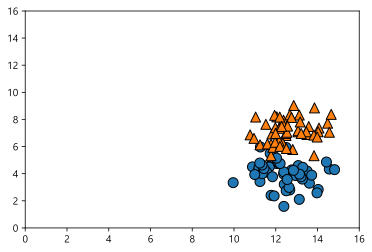

In [14]:
X, y = make_blobs(n_samples=100, centers=2, random_state=4, cluster_std=1)
X += 3
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlim(0, 16)
plt.ylim(0, 16)
plt.show()

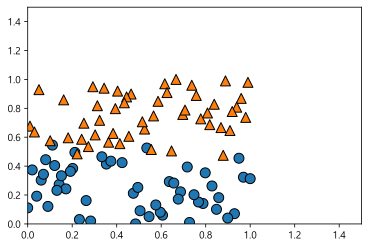

In [17]:
sc = QuantileTransformer(n_quantiles=100).fit(X)
X_sc = sc.transform(X)
mglearn.discrete_scatter(X_sc[:, 0], X_sc[:, 1], y)
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.show()

(array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

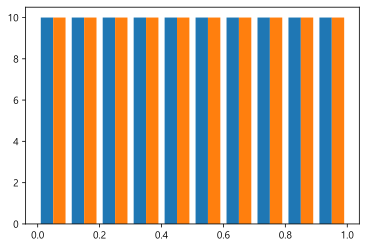

In [30]:
plt.hist(X_sc)

(array([100., 167.,  68.,  34.,  38.,   9.,   4.,   3.,   1.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

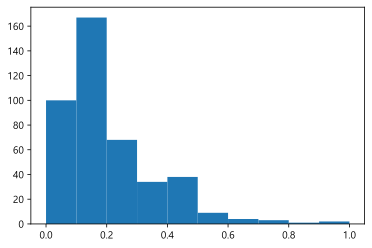

In [28]:
plt.hist(X_train_sc[:, 3])

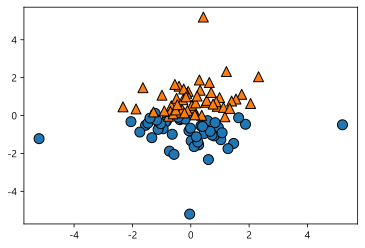

In [31]:
sc = QuantileTransformer(n_quantiles=100, output_distribution='normal').fit(X)
X_sc = sc.transform(X)
mglearn.discrete_scatter(X_sc[:, 0], X_sc[:, 1], y)
plt.show()

(array([[ 1.,  0.,  1., 13., 35., 35., 13.,  1.,  0.,  1.],
        [ 1.,  0.,  1., 13., 35., 35., 13.,  1.,  0.,  1.]]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 2 BarContainer objects>)

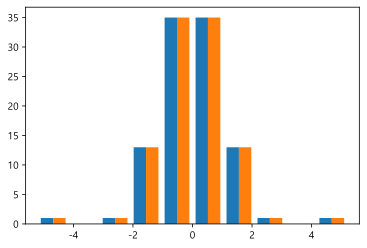

In [32]:
plt.hist(X_sc)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  2., 38., 41., 19.],
        [ 8., 20., 22., 18., 26.,  6.,  0.,  0.,  0.,  0.]]),
 array([ 1.58657135,  2.90963231,  4.23269327,  5.55575423,  6.87881519,
         8.20187615,  9.52493711, 10.84799806, 12.17105902, 13.49411998,
        14.81718094]),
 <a list of 2 BarContainer objects>)

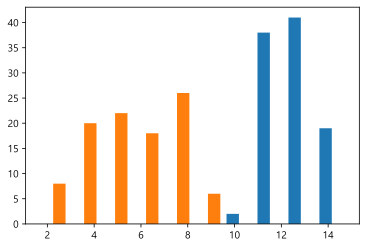

In [33]:
plt.hist(X)